# Kernel PCA
- used for non linear problems
- https://scikit-learn.org/stable/auto_examples/decomposition/plot_kernel_pca.html
- https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html
- https://scikit-learn.org/stable/modules/decomposition.html#kernel-pca

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import scipy.cluster.hierarchy as hc

### disable warnings
- comment them out at least once to see what they are in the first place

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Functions

In [3]:
def dendroGram(df, title):
    plt.figure(figsize=(10,6))
    dendrogram = hc.dendrogram(hc.linkage(df, method='ward'))
    plt.title(title)
    plt.xlabel('Customers')
    plt.ylabel("euclidean distances")
    plt.show()
    
def decisionBoundary(X, y, title):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
    plt.title(title)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend()
    plt.show()

### Get split and scale the data

In [4]:
df = pd.read_csv('Social_Network_Ads.csv')
rows = len(df)
cols = len(df.keys())
print(rows, cols)
df.head()

400 5


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


### Pandas offers in-place dummy variable creation 
- will place the new columns at the end, so pay attention!`

In [5]:
X = (pd.get_dummies(df.iloc[:,1:cols-1], prefix=['Gender']).values).astype('int32')
y = df.iloc[:,(df.shape[1]-1)].values
print(y[0])
print(X[0])

0
[   19 19000     0     1]


### Train a regression model on all features (except user id)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Evaluate the model on all features before kernel-pca

In [7]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

### View the dendrogram

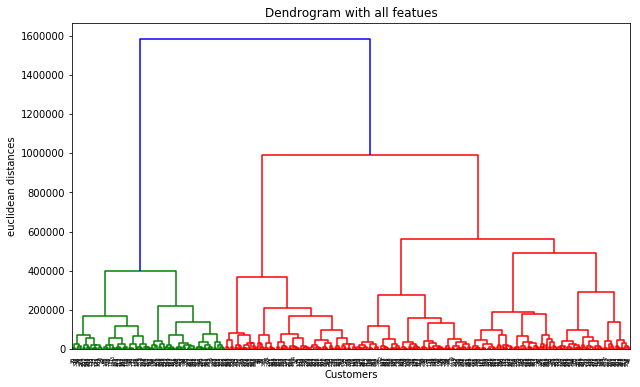

In [8]:
dendroGram(pd.get_dummies(df, prefix=['Gender']), "Dendrogram with all featues")

### Accuracy

In [9]:
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(cm)
print(acc)

[[44  3]
 [14 19]]
0.7875


### Now only use age and income

In [10]:
X = df.iloc[:, [2, 3]].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

### View dendrogram based only on income and age

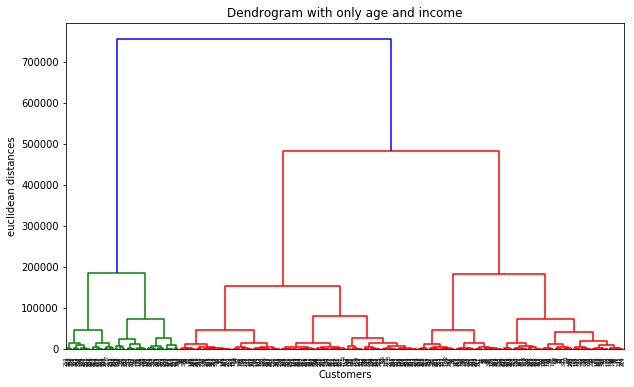

In [12]:
_X = df.iloc[:, [2, 3]].values
dendroGram(_X, "Dendrogram with only age and income")

### Accuracy of a regression model with only age and income

In [13]:
cm2 = confusion_matrix(y_test, y_pred)
acc2 = accuracy_score(y_test, y_pred)
print(cm2)
print(acc2)

[[44  2]
 [11 23]]
0.8375


### View the decision boundary

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


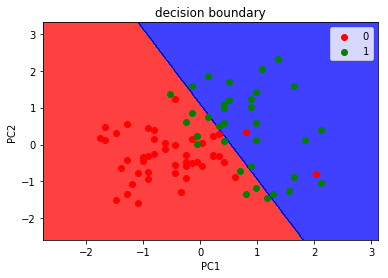

In [14]:
decisionBoundary(X_test, y_test, "decision boundary")

### Now perfrom Kernel PCA
- **reset the dataset!**

In [15]:
X = (pd.get_dummies(df.iloc[:,1:cols-1], prefix=['Gender']).values).astype('int32')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
kpca = KernelPCA(n_components=2, kernel='rbf')
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)

In [17]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

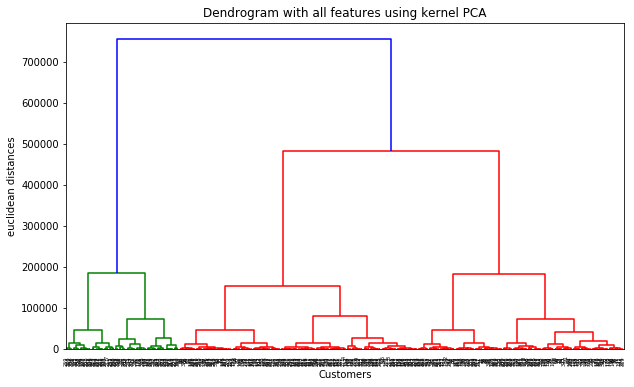

In [18]:
_X = df.iloc[:, [2, 3]].values
dendroGram(_X, "Dendrogram with all features using kernel PCA")

In [19]:
cm3 = confusion_matrix(y_test, y_pred)
acc3 = accuracy_score(y_test, y_pred)
print(cm3)
print(acc3)

[[47  9]
 [ 4 20]]
0.8375


### View the decision boundary

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


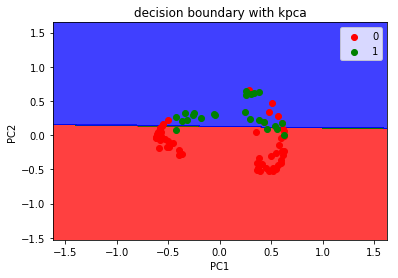

In [21]:
decisionBoundary(X_test, y_test, "decision boundary with kpca")

### Comparison

In [22]:
print("accuracy with all features: ", acc)
print("accuracy with reduced set : ", acc2)
print("accuracy with kpca w/ rbf : ", acc3)

accuracy with all features:  0.7875
accuracy with reduced set :  0.8375
accuracy with kpca w/ rbf :  0.8375
